# Homework 03
## Visualization of gradient descent by 20175437 신준섭

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

# make figures to plot or scatter somethings
def make_fig():
    fig, ax = plt.subplots(1, figsize=(6, 6))   # make the figure

    return fig, ax

## 1. Input points

### Load set of data points from the CSV file
$$\{ (x^{(i)}, y^{(i)}) \}_{i=1}^{N}$$

C:\ProgramData\Anaconda3\envs\machine-learning\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


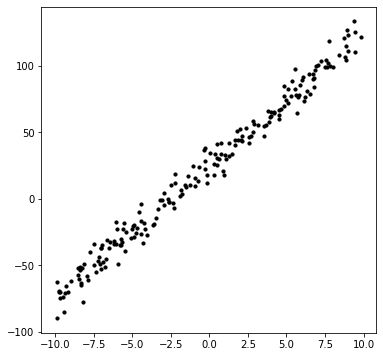

In [2]:
filename = "data.csv"
data = np.genfromtxt(filename, delimiter=',')

# cut the datas in column
data_x = data[:, 0]
data_y = data[:, 1]

fig, ax = make_fig() # make figure

# Scatter the points
ax.scatter(data_x, data_y, c='black', s=10)

fig.show()

## 2. Linear regression result

### Linear model hypothesis
$$h_\theta(x) = \theta_0 + \theta_1 x$$
where $\theta = (\theta_0, \theta_1)$
and $\theta_0, \theta_1 \in \mathbb{R}$

### Objective function
$$J(\theta_0, \theta_1) = \frac{1}{2 m} \sum_{i=1}^m ( \theta_0 + \theta_1 x^{(i)} - y^{(i)} )^2$$

### Gradient Descent
$$\theta_0^{(t+1)} := \theta_0^{(t)} - \alpha \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})$$
$$\theta_1^{(t+1)} := \theta_1^{(t)} - \alpha \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) x^{(i)}$$
$$$$

C:\ProgramData\Anaconda3\envs\machine-learning\lib\site-packages\ipykernel_launcher.py:36: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


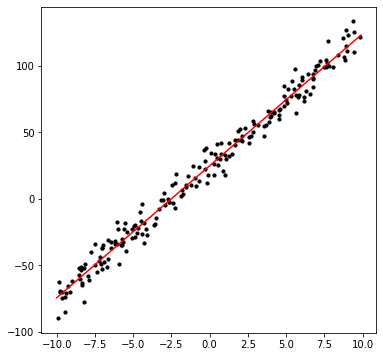

In [3]:
# define the loss funcntion
def getLoss(h, y):
    return (1.0/(2*len(h)))*np.sum( np.power(h-y, 2))

# define the gradient descent
def gradient_descent(t0, t1, lr, h, y, x):
    new_t0 = t0 - lr * 1.0/len(h) * np.sum(h-y)
    new_t1 = t1 - lr * 1.0/len(h) * np.sum((h-y) * x) 
    return new_t0, new_t1

alpha = 0.001           # learning reate
eps = 27.5              # eplsilon(small number) to check the convergence

th0, th1 = -30.0, -30
h = th1 * data_x + th0

th0_record = [th0]
th1_record = [th1]
loss_record = [getLoss(h, data_y)]
# gradient descent checking loss
while getLoss(h, data_y) > eps: 
    th0, th1 = gradient_descent(th0, th1, alpha, h, data_y, data_x)
    h = th1 * data_x + th0
    loss_record.append(getLoss(h, data_y))
    th0_record.append(th0)
    th1_record.append(th1)

x = np.arange(-10.0, 10.0, 0.1)
h_y = th0 + th1 * x

fig, ax = make_fig()

ax.scatter(data_x, data_y, c='black', s=10)
ax.plot(x, h_y, color='red')

fig.show()

## 3. Plot energy surface
### plot the energy surface
$$(\theta_0, \theta_1, J(\theta_0, \theta_1)$$

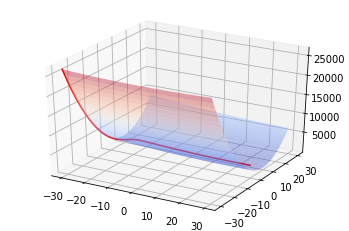

In [4]:
th0_range = np.arange(-30.0, 30.0, 0.1)
th1_range = np.arange(-30.0, 30.0, 0.1)

th0_range, th1_range = np.meshgrid(th0_range, th1_range)

m = len(data_x)
sum_x = np.sum(data_x)
sum_y = np.sum(data_y)
sum_xy = np.sum(data_x * data_y)
sum_x2 = np.sum(data_x * data_x)
sum_y2 = np.sum(data_y * data_y)

J = 0.5 * th0_range * th0_range
J = J + (1.0 / m) * th0_range * th1_range * sum_x
J = J + 1.0 / (2.0 * m) * th1_range * th1_range * sum_x2
J = J - 1.0 / m * th0_range * sum_y
J = J - 1.0 / m * th1_range * sum_xy
J = J + 1.0 / (2.0 * m) * sum_y2

fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(th0_range, th1_range, J, cmap=cm.coolwarm, alpha=0.4)

ax.plot3D(th0_record, th1_record, loss_record,'red')
#ax.scatter(th0_record, th1_record, loss_record, c='red')

plt.show()